# Gradient Descent

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [17]:
a = np.array([1, 3, 2, 4])

In [18]:
a

array([1, 3, 2, 4])

In [19]:
type(a)

numpy.ndarray

In [20]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [21]:
A[0]

array([3, 1, 2])

In [22]:
C[2, 0]

np.int64(4)

In [23]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [24]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [25]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [26]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [27]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [28]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [29]:
# A + B

In [30]:
# A * B

### Dot product

In [31]:
A.shape

(2, 3)

In [32]:
B.shape

(3, 2)

In [33]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [ ]:
np.dot(A, B)

In [ ]:
B.dot(A)

In [ ]:
C.shape

In [ ]:
A.shape

In [ ]:
C.dot(A)

Uncomment the code in the next cell to visualize the error:

In [ ]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [34]:
df = pd.read_csv('../data/banknotes.csv')

In [35]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [36]:
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [37]:
import seaborn as sns

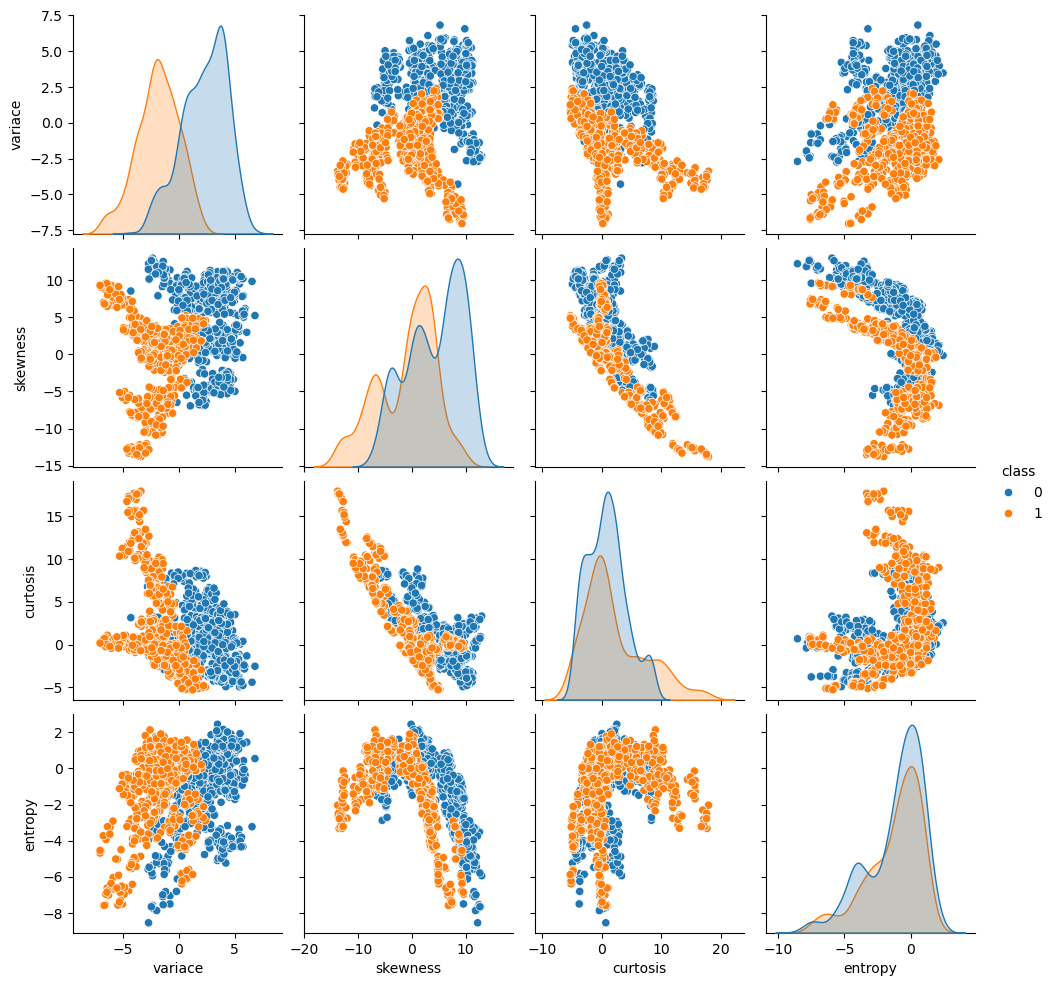

In [38]:
sns.pairplot(df, hue="class");

#### Baseline model

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [40]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [41]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99636364, 0.98540146, 0.99635036, 0.99635036])

### Logistic Regression Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [43]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [44]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10


/opt/miniconda3/envs/ztdltest/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.4938 - loss: 0.8062
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.5188 - loss: 0.7650
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.5479 - loss: 0.7283
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.5677 - loss: 0.6954
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.5750 - loss: 0.6657
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5875 - loss: 0.6390
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.6073 - loss: 0.6149
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.6219 - loss: 0.5929
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.6375 - loss: 0.5728
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.6615 - loss: 0.5543


In [45]:
historydf = pd.DataFrame(history.history, index=history.epoch)

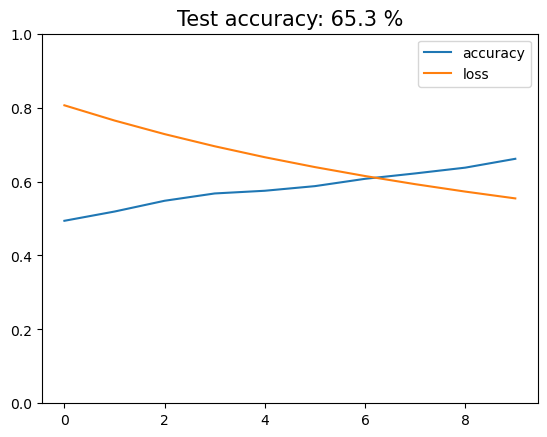

In [46]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [47]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

/opt/miniconda3/envs/ztdltest/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
historydf = pd.concat(dflist, axis=1)

In [49]:
historydf

,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss
0,0.602083,0.632896,0.493750,0.967838,0.592708,0.641614,0.956250,0.203917
1,0.668750,0.576839,0.935417,0.423342,0.878125,0.351450,0.970833,0.115667
2,0.725000,0.533065,0.940625,0.323137,0.932292,0.260437,0.973958,0.090572
3,0.775000,0.497624,0.943750,0.274120,0.942708,0.210357,0.979167,0.077443
4,0.794792,0.468065,0.942708,0.241469,0.960417,0.178627,0.978125,0.069570
5,0.813542,0.442812,0.951042,0.217330,0.964583,0.157252,0.980208,0.064120
6,0.834375,0.420857,0.956250,0.198591,0.967708,0.141339,0.980208,0.059942
7,0.852083,0.401504,0.961458,0.183481,0.969792,0.129342,0.979167,0.056779
8,0.865625,0.384237,0.962500,0.171027,0.968750,0.119898,0.981250,0.054257
9,0.876042,0.368665,0.964583,0.160627,0.969792,0.112225,0.981250,0.052273


In [50]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [51]:
historydf

learning_rate      0.01                0.05                0.10            \
metric         accuracy      loss  accuracy      loss  accuracy      loss   
0              0.602083  0.632896  0.493750  0.967838  0.592708  0.641614   
1              0.668750  0.576839  0.935417  0.423342  0.878125  0.351450   
2              0.725000  0.533065  0.940625  0.323137  0.932292  0.260437   
3              0.775000  0.497624  0.943750  0.274120  0.942708  0.210357   
4              0.794792  0.468065  0.942708  0.241469  0.960417  0.178627   
5              0.813542  0.442812  0.951042  0.217330  0.964583  0.157252   
6              0.834375  0.420857  0.956250  0.198591  0.967708  0.141339   
7              0.852083  0.401504  0.961458  0.183481  0.969792  0.129342   
8              0.865625  0.384237  0.962500  0.171027  0.968750  0.119898   
9              0.876042  0.368665  0.964583  0.160627  0.969792  0.112225   

learning_rate      0.50            
metric         accuracy      loss  
0              0.956250  0.203917  
1              0.970833  0.115667  
2              0.973958  0.090572  
3              0.979167  0.077443  
4              0.978125  0.069570  
5              0.980208  0.064120  
6              0.980208  0.059942  
7              0.979167  0.056779  
8              0.981250  0.054257  
9              0.981250  0.052273

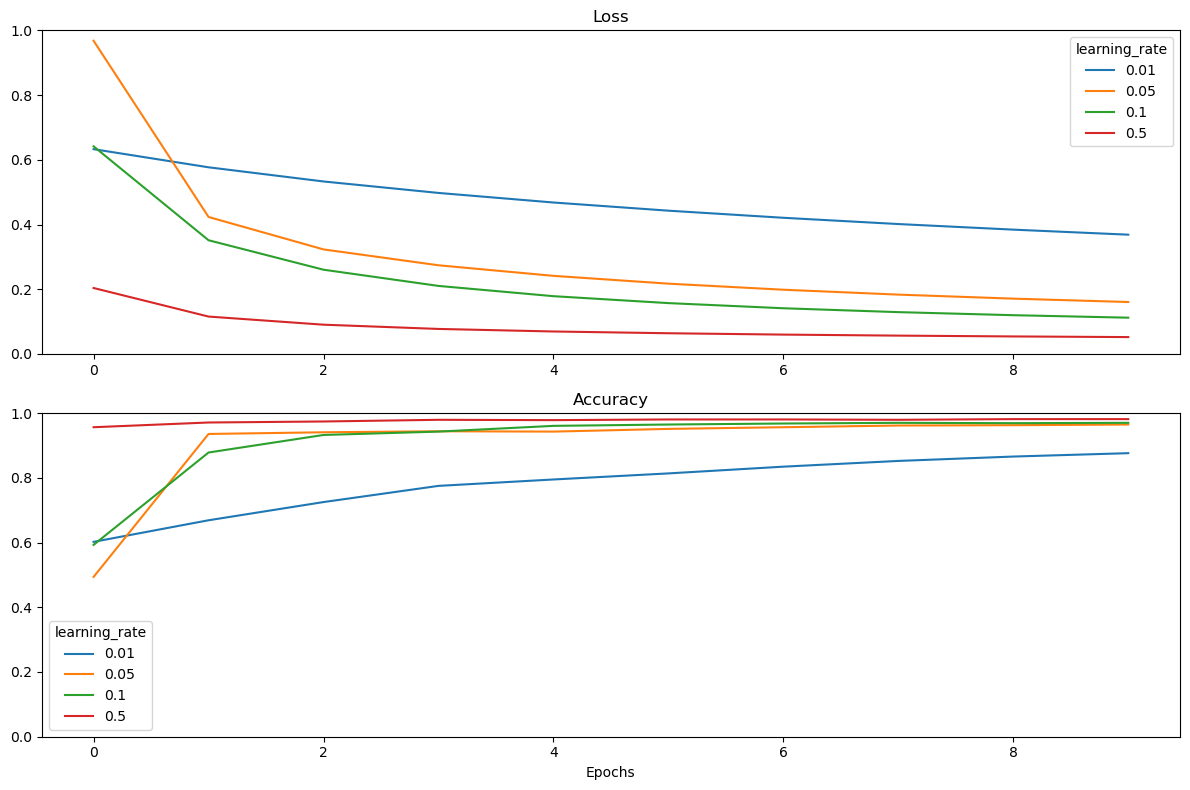

In [52]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [ ]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [ ]:
historydf

In [ ]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [ ]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

In [ ]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [ ]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

In [ ]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

In [ ]:
result

In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
inp = model.layers[0].input
out = model.layers[0].output

In [ ]:
inp

In [ ]:
out

In [ ]:
features_function = K.function([inp], [out])

In [ ]:
features_function

In [ ]:
features_function([X_test])[0].shape

In [ ]:
features = features_function([X_test])[0]

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard